In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [43]:
assets = pd.read_csv("/content/drive/MyDrive/Rocket/Assets.csv")
borrowers = pd.read_csv("/content/drive/MyDrive/Rocket/Borrowers.csv")
creditreports = pd.read_csv("/content/drive/MyDrive/Rocket/CreditReports.csv")
incomes = pd.read_csv("/content/drive/MyDrive/Rocket/Incomes.csv")
liabilities = pd.read_csv("/content/drive/MyDrive/Rocket/Liabilities.csv")
mortagages = pd.read_csv("/content/drive/MyDrive/Rocket/Mortgages.csv")

### Functions

In [4]:
def get_info(df, df_name):
    print("\n\nDescription of ",df_name)
    info = df.info()
    print("\n\nDimension - ",df.shape)
    desc = df.describe()
    print("\n\nNull values per column\n",df.isnull().sum())
    if 'APPLICATIONID' in df.columns:
        print("\n\nUnique Applications",df['APPLICATIONID'].nunique())

## Cleaning

### Assets

In [5]:
print(assets.nunique())
print(assets.shape)

APPLICATIONID    19127
ASSET_ID         60702
TYPE                 7
VALUE             9051
dtype: int64
(60702, 4)


In [6]:
# Filter the Assets df by TYPE == 'vehicle' and VALUE less than 2
rows_to_delete  = assets[(assets['TYPE'] == 'vehicle') & (assets['VALUE'] < 2)].index

# Delete the rows with the specified indices
assets = assets.drop(rows_to_delete)
assets

,APPLICATIONID,ASSET_ID,TYPE,VALUE
0,400ef336-9f32-4b57-bad2-aa0093f58db3,ea916579-bcb2-4aae-a63d-66dbb0c5c2b4,investment,9000.0
1,16d4a079-dfd8-48a8-90f7-f89e288bc601,296d61db-366b-402e-8dc9-1bd0766f40ea,vehicle,60000.0
2,b936c281-64ab-45ab-b9e8-df19895a4bc8,30a5770d-ff0c-48ea-b0fd-efbfa6f167d5,rrsp,243000.0
3,400ef336-9f32-4b57-bad2-aa0093f58db3,9f5d3ffe-27b0-4f78-9314-f8c2edcae1de,cash_savings,20000.0
4,400ef336-9f32-4b57-bad2-aa0093f58db3,eb348413-faf1-41f2-a88d-a4b09334391c,cash_savings,40000.0
...,...,...,...,...
60697,c925dc43-2801-4365-badf-73c672959352,04150636-39eb-415a-8a3c-b8b499dac2e7,investment,6600.0
60698,c925dc43-2801-4365-badf-73c672959352,5686a681-e002-4baa-81d1-aa6161cf9cdc,investment,16428.0
60699,c925dc43-2801-4365-badf-73c672959352,8d502b9f-4036-40e7-afc6-beda9607f929,vehicle,6500.0
60700,c925dc43-2801-4365-badf-73c672959352,8c16ac03-f2b3-492d-9b76-e81c4ec6be42,vehicle,17500.0


In [7]:
# Group by APPLICATIONID and calculate the sum of values for each group
total_values = assets.groupby('APPLICATIONID')['VALUE'].sum()

# Create a new DataFrame to store the aggregated results
aggregated_rows = []

# Iterate over each application ID and add a new row for each with the total value
for app_id, total_value in total_values.items():
    aggregated_rows.append({
        'APPLICATIONID': app_id,
        'ASSET_ID': '001',
        'TYPE': 'total',
        'VALUE': total_value
    })

# Append the aggregated rows to the existing DataFrame
assets = assets.append(aggregated_rows, ignore_index=True)

assets

<ipython-input-7-1e79a587ef79>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  assets = assets.append(aggregated_rows, ignore_index=True)


,APPLICATIONID,ASSET_ID,TYPE,VALUE
0,400ef336-9f32-4b57-bad2-aa0093f58db3,ea916579-bcb2-4aae-a63d-66dbb0c5c2b4,investment,9000.00
1,16d4a079-dfd8-48a8-90f7-f89e288bc601,296d61db-366b-402e-8dc9-1bd0766f40ea,vehicle,60000.00
2,b936c281-64ab-45ab-b9e8-df19895a4bc8,30a5770d-ff0c-48ea-b0fd-efbfa6f167d5,rrsp,243000.00
3,400ef336-9f32-4b57-bad2-aa0093f58db3,9f5d3ffe-27b0-4f78-9314-f8c2edcae1de,cash_savings,20000.00
4,400ef336-9f32-4b57-bad2-aa0093f58db3,eb348413-faf1-41f2-a88d-a4b09334391c,cash_savings,40000.00
...,...,...,...,...
79477,fff04e89-3c4d-4525-9fff-dca1f343d0a3,001,total,339509.37
79478,fff1462e-ea34-40a5-9700-d076384a2781,001,total,100000.00
79479,fff5f8fe-03ee-40b4-980d-b7603708ed16,001,total,30000.00
79480,fffa82cb-0027-4fab-85fd-120b7c108a88,001,total,150000.00


In [8]:
assets[(assets['TYPE'] == 'total') & (assets['VALUE'] < 100)]

,APPLICATIONID,ASSET_ID,TYPE,VALUE
61710,1267fd8b-42c7-4bac-8ec5-6ba5e2767a66,001,total,3.00
62612,1f13cf99-9ae7-49e4-b5da-d55eaeb7776f,001,total,10.00
64080,31e016ba-b855-4eff-84e8-d9f08c0d8e15,001,total,1.00
65167,406bbf88-a1f9-4d87-8b03-e9bc6f28c5ef,001,total,2.00
67704,62029a5d-3867-4cf1-b35e-54c277935042,001,total,1.00
67749,6289c937-96ec-44bc-b657-e879ee8b5423,001,total,1.00
67774,62e7a0fc-bc93-4714-9756-bce6ad265b80,001,total,1.00
67877,642b6d74-4635-4e6d-adc8-fd8aa2ae4af7,001,total,1.00
68602,6d7cff39-ad57-433b-9b0a-c86006a6ec7b,001,total,1.00
69044,73724419-f10d-401e-b535-4319ae8869b2,001,total,1.00


In [9]:
# Filter the DataFrame to include only the rows where TYPE is 'total' and VALUE is less than 100
filtered_assets = assets[(assets['TYPE'] == 'total') & (assets['VALUE'] < 100)]

# Get the application IDs of the filtered rows
filtered_application_ids = filtered_assets['APPLICATIONID']

# Delete the rows with the filtered application IDs from the original DataFrame
assets = assets[~assets['APPLICATIONID'].isin(filtered_application_ids)]

In [10]:
assets

,APPLICATIONID,ASSET_ID,TYPE,VALUE
0,400ef336-9f32-4b57-bad2-aa0093f58db3,ea916579-bcb2-4aae-a63d-66dbb0c5c2b4,investment,9000.00
1,16d4a079-dfd8-48a8-90f7-f89e288bc601,296d61db-366b-402e-8dc9-1bd0766f40ea,vehicle,60000.00
2,b936c281-64ab-45ab-b9e8-df19895a4bc8,30a5770d-ff0c-48ea-b0fd-efbfa6f167d5,rrsp,243000.00
3,400ef336-9f32-4b57-bad2-aa0093f58db3,9f5d3ffe-27b0-4f78-9314-f8c2edcae1de,cash_savings,20000.00
4,400ef336-9f32-4b57-bad2-aa0093f58db3,eb348413-faf1-41f2-a88d-a4b09334391c,cash_savings,40000.00
...,...,...,...,...
79477,fff04e89-3c4d-4525-9fff-dca1f343d0a3,001,total,339509.37
79478,fff1462e-ea34-40a5-9700-d076384a2781,001,total,100000.00
79479,fff5f8fe-03ee-40b4-980d-b7603708ed16,001,total,30000.00
79480,fffa82cb-0027-4fab-85fd-120b7c108a88,001,total,150000.00


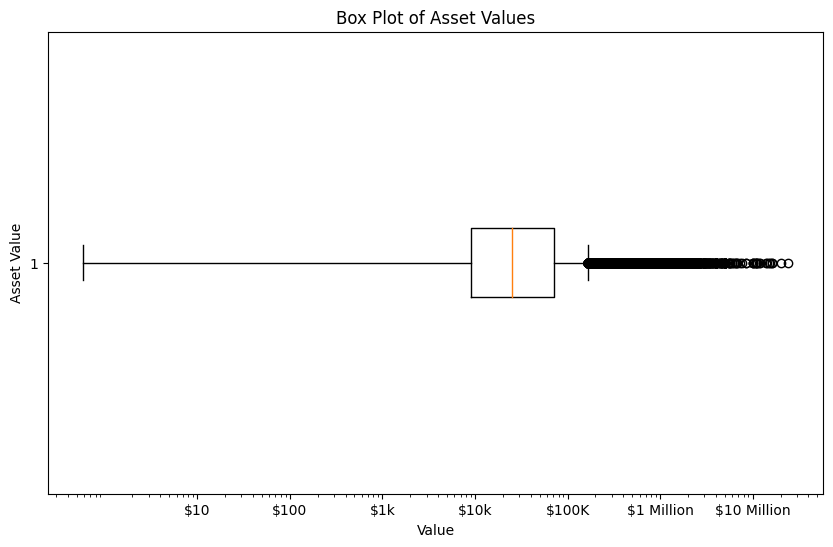

In [11]:
plt.figure(figsize=(10, 6))
plt.boxplot(assets['VALUE'], vert=False)
plt.title('Box Plot of Asset Values')
plt.xlabel('Value')
plt.ylabel('Asset Value')  # Added label for the Y axis
plt.xscale('log')  # Logarithmic scale for better visualization
# Setting custom ticks on the X axis to represent monetary values
plt.xticks([10, 100, 1000, 10000, 100000, 1000000, 10000000],
           ['$10', '$100', '$1k', '$10k', '$100K', '$1 Million', '$10 Million'])
plt.show()

### Borrower

In [12]:
get_info(borrowers,"borrowers")



Description of  borrowers
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80882 entries, 0 to 80881
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   APPLICATIONID                  80882 non-null  object 
 1   DEPENDENTS                     46356 non-null  float64
 2   FIRSTTIME                      26149 non-null  object 
 3   BORROWER_ID                    80882 non-null  object 
 4   INCLUDERENTALAMOUNTMONTHLYTDS  2129 non-null   object 
 5   ISHIDDEN                       80882 non-null  bool   
 6   ISMAINBORROWER                 80882 non-null  bool   
 7   MARITAL                        53057 non-null  object 
 8   RELATIONSHIPTOMAINBORROWER     15973 non-null  object 
 9   RENTALAMOUNTMONTHLY            9988 non-null   float64
dtypes: bool(2), float64(2), object(6)
memory usage: 5.1+ MB


Dimension -  (80882, 10)


Null values per column
 APPLICATIONID                

In [13]:
# Fill missing values in the 'DEPENDENTS' column with -1
borrowers['DEPENDENTS'].fillna(-1, inplace=True)

# Fill missing values in the 'INCLUDERENTALAMOUNTMONTHLYTDS' column with 'unknown'
borrowers['INCLUDERENTALAMOUNTMONTHLYTDS'].fillna('Unknown', inplace=True)

# Drop the 'ISHIDDEN' column
#borrowers.drop(columns=['ISHIDDEN'], inplace=True)

# Replace missing values in the 'RENTALAMOUNTMONTHLY' column with -1
borrowers['RENTALAMOUNTMONTHLY'].fillna(-1, inplace=True)

# Filter the DataFrame based on the conditions
filtered_borrowers = borrowers[(borrowers['INCLUDERENTALAMOUNTMONTHLYTDS'] == True) & (borrowers['RENTALAMOUNTMONTHLY'] < 100)]

# Ensure filtered_application_ids is a set
if not isinstance(filtered_application_ids, set):
    filtered_application_ids = set(filtered_application_ids)

# Append application IDs from filtered_borrowers['APPLICATIONID'] into filtered_application_ids
filtered_application_ids.update(filtered_borrowers['APPLICATIONID'].tolist())

# Delete the corresponding rows from the DataFrame
borrowers = borrowers[~borrowers['APPLICATIONID'].isin(filtered_application_ids)]

# Fill missing values in the 'MARITAL' column with "Unknown"
borrowers['MARITAL'].fillna("Unknown", inplace=True)

# Fill missing values in the 'MARITAL' column with "Unknown"
borrowers['RELATIONSHIPTOMAINBORROWER'].fillna("Undefined", inplace=True)



<ipython-input-13-5b084a496102>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  borrowers['MARITAL'].fillna("Unknown", inplace=True)
<ipython-input-13-5b084a496102>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  borrowers['RELATIONSHIPTOMAINBORROWER'].fillna("Undefined", inplace=True)


In [14]:
borrowers

,APPLICATIONID,DEPENDENTS,FIRSTTIME,BORROWER_ID,INCLUDERENTALAMOUNTMONTHLYTDS,ISHIDDEN,ISMAINBORROWER,MARITAL,RELATIONSHIPTOMAINBORROWER,RENTALAMOUNTMONTHLY
0,7fd3c8b1-bfe2-4ee5-9e45-1b3512e81e4b,-1.0,NaN,4050056a-2897-4587-8e90-7dd4cb49cec6,Unknown,False,True,Unknown,Undefined,-1.0
1,94ae848b-cafb-4464-b545-1957b0c2f713,0.0,NaN,a992d0ef-6099-4bb1-bf9d-bc6037e7138c,Unknown,False,True,widowed,Undefined,-1.0
2,e6c15716-f72c-4dcf-a095-30e3da06d3a0,0.0,NaN,1bc0442b-d7e9-4c71-8126-c9734b187f9b,Unknown,False,True,married,Undefined,-1.0
3,e18bcfe8-b6e8-4636-8937-8360e69d822f,-1.0,NaN,a45fe05c-07b8-499f-8746-2cc2634dd864,Unknown,False,True,Unknown,Undefined,-1.0
4,ace015ef-cc39-45af-9cdd-fa855edc935a,-1.0,NaN,26a89b13-7b68-4a12-a539-12c5b4538b75,Unknown,False,True,Unknown,Undefined,-1.0
...,...,...,...,...,...,...,...,...,...,...
80877,36f75297-2985-43c3-991d-a0b4b4e1e814,1.0,True,951d87c2-b5b7-426c-a612-996550697073,False,False,False,married,spouse,600.0
80878,36f75297-2985-43c3-991d-a0b4b4e1e814,1.0,True,43229fe0-3f3d-4b7a-82de-80a6f793a884,False,False,True,married,Undefined,600.0
80879,c925dc43-2801-4365-badf-73c672959352,-1.0,True,6f50edd5-c0ad-461b-9715-b24dab9109c1,Unknown,False,True,single,Undefined,-1.0
80880,1f34fe95-49b8-4d17-8bc2-28b926c0d399,0.0,True,f35b4788-a661-4511-b634-b1d6f94b395c,False,False,False,married,spouse,1.0


### Creditreport

In [15]:
get_info(creditreports,"creditreports")



Description of  creditreports
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60348 entries, 0 to 60347
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   APPLICATION_ID   60348 non-null  object 
 1   BORROWERID       60348 non-null  object 
 2   CREATEDAT        60348 non-null  object 
 3   CREDITSCORE      53007 non-null  float64
 4   CREDITREPORT_ID  60348 non-null  object 
dtypes: float64(1), object(4)
memory usage: 2.3+ MB


Dimension -  (60348, 5)


Null values per column
 APPLICATION_ID        0
BORROWERID            0
CREATEDAT             0
CREDITSCORE        7341
CREDITREPORT_ID       0
dtype: int64


In [16]:
# Drop the 'CREDITREPORT_ID' column
creditreports.drop(columns=['CREDITREPORT_ID'], inplace=True)

# Convert 'CREATEDAT' column to datetime format
creditreports['CREATEDAT'] = pd.to_datetime(creditreports['CREATEDAT'],utc = True)

# Create a new column 'isRepeat' based on duplicated 'APPLICATION_ID'
creditreports['isRepeat'] = creditreports.duplicated(subset='APPLICATION_ID', keep=False)

# Step 1: Identify repeated APPLICATION_IDs
repeated_ids = creditreports['APPLICATION_ID'].duplicated(keep=False)

# Step 2: Iterate over repeated APPLICATION_IDs
for app_id, is_repeated in zip(creditreports['APPLICATION_ID'], repeated_ids):
    if is_repeated:
        # Step 3: Filter DataFrame for the specific APPLICATION_ID
        app_entries = creditreports[creditreports['APPLICATION_ID'] == app_id]

        # Step 4: Sort DataFrame by CREATEDAT in ascending order
        app_entries = app_entries.sort_values(by='CREATEDAT')

        # Get the oldest and newest entries
        oldest_entry = app_entries.iloc[0]
        newest_entry = app_entries.iloc[-1]

        # Compare CREDITSCORE between oldest and newest entries
        is_improve = newest_entry['CREDITSCORE'] > oldest_entry['CREDITSCORE']

        # Set value of isImprove column
        creditreports.loc[creditreports['APPLICATION_ID'] == app_id, 'isImprove'] = is_improve

# Fill NaN values in isImprove column with False
creditreports['isImprove'].fillna(False, inplace=True)


In [17]:
creditreports


,APPLICATION_ID,BORROWERID,CREATEDAT,CREDITSCORE,isRepeat,isImprove
0,e6c15716-f72c-4dcf-a095-30e3da06d3a0,1bc0442b-d7e9-4c71-8126-c9734b187f9b,2024-02-26 22:03:50.771456+00:00,784.0,True,False
1,400ef336-9f32-4b57-bad2-aa0093f58db3,383dc692-8385-405c-9ed6-4b4da41e47e5,2024-02-26 22:53:26.982797+00:00,756.0,True,False
2,94ae848b-cafb-4464-b545-1957b0c2f713,a992d0ef-6099-4bb1-bf9d-bc6037e7138c,2024-02-26 22:43:33.855110+00:00,534.0,False,False
3,e6c15716-f72c-4dcf-a095-30e3da06d3a0,1bc0442b-d7e9-4c71-8126-c9734b187f9b,2024-02-26 22:03:20.835958+00:00,NaN,True,False
4,79e95817-04ec-4a00-b38f-8dccfab870b4,9caf8927-3081-4869-be6b-3c8cf2b7353a,2024-02-26 22:15:12.723530+00:00,812.0,True,True
...,...,...,...,...,...,...
60343,36f75297-2985-43c3-991d-a0b4b4e1e814,951d87c2-b5b7-426c-a612-996550697073,2023-12-18 20:36:00.589694+00:00,739.0,True,True
60344,36f75297-2985-43c3-991d-a0b4b4e1e814,43229fe0-3f3d-4b7a-82de-80a6f793a884,2024-01-22 21:27:30.109430+00:00,604.0,True,True
60345,ea60e207-5d40-4cfe-b901-2776e8b674be,ab85b585-7c27-4a7b-850f-75021fec576f,2024-02-14 22:28:29.968597+00:00,846.0,True,True
60346,c925dc43-2801-4365-badf-73c672959352,6f50edd5-c0ad-461b-9715-b24dab9109c1,2024-01-20 14:22:51.182977+00:00,774.0,False,False


### Mortagages

In [18]:
get_info(mortagages,"mortagages")



Description of  mortagages
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28214 entries, 0 to 28213
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   MORTGAGE_ID              28214 non-null  object 
 1   PROPERTY_ID              28214 non-null  object 
 2   APPLICATIONID            28214 non-null  object 
 3   LENDER                   25036 non-null  object 
 4   ORIGINALMORTGAGEAMOUNT   7837 non-null   float64
 5   PAYMENT                  24663 non-null  float64
 6   PAYMENTFREQUENCY         25538 non-null  object 
 7   PAYOFF                   28214 non-null  bool   
 8   PAYOFFTYPE               20220 non-null  object 
 9   RATE                     21658 non-null  float64
 10  REMAININGAMOUNT          27242 non-null  float64
 11  RENEWAL                  19918 non-null  object 
 12  MORTGAGE_TERM            23777 non-null  object 
 13  MORTGAGE_TYPE            24286 non-null  object

In [20]:
# Fill the null values in the 'LENDER' column with 'Unknown'
mortagages['LENDER'].fillna('Unknown', inplace=True)

# Filter the DataFrame based on the condition
filtered_mortgages = mortagages[mortagages['ORIGINALMORTGAGEAMOUNT'] < 1000]

# Ensure filtered_application_ids is a set
if not isinstance(filtered_application_ids, set):
    filtered_application_ids = set(filtered_application_ids)

# Append application IDs from filtered_mortgages['APPLICATIONID'] into filtered_application_ids
filtered_application_ids.update(filtered_mortgages['APPLICATIONID'].tolist())

# Drop the filtered rows from the DataFrame
mortagages.drop(mortagages[mortagages['ORIGINALMORTGAGEAMOUNT'] < 1000].index, inplace=True)

# Store the application IDs of the rows to be deleted
filtered_application_ids.update(mortagages[(mortagages['PAYMENT'] == 0) & (mortagages['PAYOFF'] == False)]['APPLICATIONID'].tolist())

# Delete the rows where PAYMENT is 0 and PAYOFF is False
mortagages = mortagages[(mortagages['PAYMENT'] != 0) | (mortagages['PAYOFF'] != False)]


### Incomes

In [23]:
get_info(incomes,"Incomes")



Description of  Incomes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83958 entries, 0 to 83957
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ACTIVE              83958 non-null  bool   
 1   APPLICATIONID       83958 non-null  object 
 2   BONUSES             41119 non-null  object 
 3   BORROWERID          83958 non-null  object 
 4   BUSINESSTYPE        6588 non-null   object 
 5   ENDDATE             10468 non-null  object 
 6   INCOME_ID           83958 non-null  object 
 7   INCOME              83958 non-null  float64
 8   INCOMEFREQUENCY     83958 non-null  object 
 9   INCOMEPERIODAMOUNT  83958 non-null  float64
 10  INDUSTRYSECTOR      42637 non-null  object 
 11  JOBTYPE             55511 non-null  object 
 12  OCCUPATION          37561 non-null  object 
 13  PAYTYPE             54358 non-null  object 
 14  SOURCE              83958 non-null  object 
 15  STARTDATE           83958 n

In [27]:
incomes['STARTDATE'] = pd.to_datetime(incomes['STARTDATE'])
incomes['ENDDATE'] = pd.to_datetime(incomes['ENDDATE'])

# Define today's date for comparison
today = pd.Timestamp(datetime.date.today())
incomes.loc[incomes['STARTDATE'] <= today, 'ENDDATE'] = today
# leave 'EndDate' as NaN (blank in pandas) if 'StartDate' is greater than today

df_same_dates = incomes[incomes['STARTDATE'] == incomes['ENDDATE']]

# Drop these rows using the .drop() method
incomes.drop(df_same_dates.index, inplace=True)

less_income_group = incomes[incomes['INCOME'] <= 100]

incomes.drop(less_income_group.index, inplace=True)

frequency_mapping = {
    'bi-weekly': 26,
    'weekly': 52,
    'monthly': 12,
    'annually': 1
}

# Step 2: Replace 'IncomeFrequency' with its digital value
incomes['DigitalIncomeFrequency'] = incomes['INCOMEFREQUENCY'].map(frequency_mapping)

# Step 3: Calculate 'income_validity'
incomes['income_validity'] = incomes['INCOME'] / incomes['DigitalIncomeFrequency']

incomes['BONUSES'].fillna("Unknown", inplace=True)
incomes['BUSINESSTYPE'].fillna("Unknown", inplace=True)
incomes['INDUSTRYSECTOR'].fillna("Unknown", inplace=True)
incomes['JOBTYPE'].fillna("Unknown", inplace=True)
incomes['PAYTYPE'].fillna("Unknown", inplace=True)
incomes['TITLE'].fillna("Unknown", inplace=True)


incomes['TITLE'] = incomes['TITLE'].replace(to_replace=[r'^\d+(\.\d+)?$', r'^\?+$'], value='unknown', regex=True)

# For more complex or specific strings not easily captured by regex, use .apply()
def replace_garbage(val):
    garbage_patterns = ['116 corn', '2275 upper middle', '7th', 'aaaa', 'aasas','...']
    if any(pattern in val for pattern in garbage_patterns):
        return 'Unknown'
    return val

incomes['TITLE'] = incomes['TITLE'].apply(replace_garbage)

# Now, your 'Title' column has replaced specified "garbage" values with 'unknown'

### Liabilities

In [44]:
get_info(liabilities,"liabilities")



Description of  liabilities
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193450 entries, 0 to 193449
Data columns (total 10 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   CREDITLIMIT               170254 non-null  float64
 1   BALANCE                   192764 non-null  float64
 2   MONTHLYPAYMENT            191381 non-null  float64
 3   PAYOFFTYPE                51982 non-null   object 
 4   TYPE                      193450 non-null  object 
 5   MATURITYDATE              415 non-null     object 
 6   IMPORTEDFROMCREDITBUREAU  193450 non-null  bool   
 7   ISCREDITBUREAUSOURCE      193450 non-null  bool   
 8   LIABILITY_ID              193450 non-null  object 
 9   APPLICATIONID             193450 non-null  object 
dtypes: bool(2), float64(3), object(5)
memory usage: 12.2+ MB


Dimension -  (193450, 10)


Null values per column
 CREDITLIMIT                  23196
BALANCE                        686
M

In [45]:
#liabilities.drop(['LIABILITY_ID'], inplace=True, axis=1)
#Replace  blank credit limit with -1 value
liabilities['CREDITLIMIT'].fillna(-1, inplace=True)

liabilities['BALANCE'].fillna(-1, inplace=True)

liabilities['MONTHLYPAYMENT'].fillna(-1, inplace=True)
liabilities['PAYOFFTYPE'].fillna("Unknown", inplace=True)
liabilities['MATURITYDATE'] = pd.to_datetime(liabilities['MATURITYDATE'])
liabilities['MATURITYDATE'].fillna('2001-01-01', inplace=True)

# Calculate the minimum monthly payment which is 1% of the balance
liabilities['minimum_monthly_payment'] = liabilities['BALANCE'] * 0.01

# Determine if the actual monthly payment is less than the minimum monthly payment
liabilities['is_minimum_payment_met'] = liabilities['MONTHLYPAYMENT'] >= liabilities['minimum_monthly_payment']

false_percentage = (liabilities['is_minimum_payment_met'] == False).sum() / len(liabilities) * 100
liabilities.drop(liabilities[liabilities['is_minimum_payment_met'] == False].index, inplace=True)

# Drop the 'IMPORTEDFROMCREDITBUREAU' and 'ISCREDITBUREAUSOURCE' columns
liabilities.drop(['IMPORTEDFROMCREDITBUREAU', 'ISCREDITBUREAUSOURCE'], axis=1, inplace=True)


In [46]:
# Group by 'APPLICATIONID' and calculate the sum of the balance for each group
current_liabilities = liabilities.groupby('APPLICATIONID')['BALANCE'].sum().reset_index()

# Create a new DataFrame with the desired values
new_rows = pd.DataFrame({
    'CREDITLIMIT': -10,
    'BALANCE': current_liabilities['BALANCE'],
    'MONTHLYPAYMENT': -10,
    'PAYOFFTYPE': 'Unknown',
    'TYPE': 'Current_liabilities',
    'MATURITYDATE': '2001-01-01',
    'LIABILITY_ID': '000',
    'APPLICATIONID': current_liabilities['APPLICATIONID']
})

# Concatenate the new DataFrame with the original DataFrame
liabilities = pd.concat([liabilities, new_rows], ignore_index=True)

In [48]:
liabilities

/usr/local/lib/python3.10/dist-packages/IPython/lib/pretty.py:700: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  output = repr(obj)
/usr/local/lib/python3.10/dist-packages/google/colab/_interactive_table_hint_button.py:178: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_html=dataframe._repr_html_(),  # pylint: disable=protected-access


,CREDITLIMIT,BALANCE,MONTHLYPAYMENT,PAYOFFTYPE,TYPE,MATURITYDATE,LIABILITY_ID,APPLICATIONID,minimum_monthly_payment,is_minimum_payment_met
0,2000.0,147.0,4.41,Unknown,credit_card,2001-01-01 00:00:00,129442c1-8dfc-465f-996e-81dff5b12674,400ef336-9f32-4b57-bad2-aa0093f58db3,1.47,True
1,4000.0,525.0,15.75,Unknown,credit_card,2001-01-01 00:00:00,a3ef7ed1-75fb-49e1-90c2-4e106e98f39b,79e95817-04ec-4a00-b38f-8dccfab870b4,5.25,True
2,9000.0,9022.0,270.66,Unknown,credit_card,2001-01-01 00:00:00,e23d7f83-8827-49bc-93bc-7580e9a1767e,94ae848b-cafb-4464-b545-1957b0c2f713,90.22,True
3,56601.0,55508.0,760.00,Unknown,personal_loan,2001-01-01 00:00:00,3554fdde-6c0c-49fc-a915-c12f25a193ad,94ae848b-cafb-4464-b545-1957b0c2f713,555.08,True
4,-1.0,-1.0,118.00,Unknown,student_loan,2001-01-01 00:00:00,db639be3-cfd2-4846-a96b-fc55697b0d07,42ed6154-f101-4848-89a2-4c1dee22465d,-0.01,True
...,...,...,...,...,...,...,...,...,...,...
166674,-10.0,3047.0,-10.00,Unknown,Current_liabilities,2001-01-01,000,fff83230-4427-43e1-a6ff-d8f701818bb9,NaN,NaN
166675,-10.0,11304.0,-10.00,Unknown,Current_liabilities,2001-01-01,000,fff8e070-a044-4125-8cb9-ab65e670418d,NaN,NaN
166676,-10.0,542.0,-10.00,Unknown,Current_liabilities,2001-01-01,000,fffcb7ce-d2bc-4df0-b128-c7d20854e839,NaN,NaN
166677,-10.0,6001.0,-10.00,Unknown,Current_liabilities,2001-01-01,000,fffe3653-9cd7-446e-bd7c-fb941bae55f7,NaN,NaN


### Export all the datasets in excel

In [57]:
# Define your datasets
datasets = {
    'assets': assets,
    'borrowers': borrowers,
    'creditreports': creditreports,
    'incomes': incomes,
    'liabilities': liabilities,
    'mortagages': mortagages
}

# Function to convert datetime columns with UTC timezone to date
def convert_utc_to_date(df):
    date_columns = df.select_dtypes(include=['datetime64[ns, UTC]']).columns
    for date_column in date_columns:
        df[date_column] = df[date_column].dt.date

# Export each dataset to Excel
for dataset_name, dataset_df in datasets.items():
    convert_utc_to_date(dataset_df)
    file_name = dataset_name + '.xlsx'  # File name will be the dataset name
    dataset_df.to_excel(file_name, index=False)
